In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
train = pd.read_csv('train_AUpWtIz/test_QyjYwdj.csv')
campaign_data = pd.read_csv('train_AUpWtIz/campaign_data.csv')
coupon_item_mapping = pd.read_csv('train_AUpWtIz/coupon_item_mapping.csv')
customer_demographics = pd.read_csv('train_AUpWtIz/customer_demographics.csv')
customer_transaction_data = pd.read_csv('train_AUpWtIz/customer_transaction_data.csv',mangle_dupe_cols=True,nrows=463598)
item_data = pd.read_csv('train_AUpWtIz/item_data.csv')

In [153]:
test = True

In [154]:
print(len(train))
train.info()

50226
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 4 columns):
id             50226 non-null int64
campaign_id    50226 non-null int64
coupon_id      50226 non-null int64
customer_id    50226 non-null int64
dtypes: int64(4)
memory usage: 1.5 MB


In [155]:
train_campaign = pd.merge(train,campaign_data,how='left',on='campaign_id')

In [156]:
print(len(train))
train.info()

50226
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50226 entries, 0 to 50225
Data columns (total 4 columns):
id             50226 non-null int64
campaign_id    50226 non-null int64
coupon_id      50226 non-null int64
customer_id    50226 non-null int64
dtypes: int64(4)
memory usage: 1.5 MB


In [157]:
train_campaign.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date
0,3,22,869,967,X,16/09/13,18/10/13
1,4,20,389,1566,Y,07/09/13,16/11/13
2,5,22,981,510,X,16/09/13,18/10/13
3,8,25,1069,361,Y,21/10/13,22/11/13
4,10,17,498,811,Y,29/07/13,30/08/13


In [158]:
train_coustomer_demographics = pd.merge(train_campaign,customer_demographics,how='left',on='customer_id')

In [159]:
len(train_coustomer_demographics)

50226

In [160]:
train_coustomer_demographics.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,3,22,869,967,X,16/09/13,18/10/13,36-45,NaN,0.0,1,NaN,5.0
1,4,20,389,1566,Y,07/09/13,16/11/13,26-35,NaN,0.0,2,NaN,9.0
2,5,22,981,510,X,16/09/13,18/10/13,26-35,NaN,0.0,2,1,1.0
3,8,25,1069,361,Y,21/10/13,22/11/13,18-25,NaN,0.0,1,NaN,3.0
4,10,17,498,811,Y,29/07/13,30/08/13,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
coupon_item = pd.merge(coupon_item_mapping,item_data,how='left',on='item_id')

In [162]:
coupon_item.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


In [163]:
coupon_item.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92663 entries, 0 to 92662
Data columns (total 5 columns):
coupon_id     92663 non-null int64
item_id       92663 non-null int64
brand         92663 non-null int64
brand_type    92663 non-null object
category      92663 non-null object
dtypes: int64(3), object(2)
memory usage: 4.2+ MB


In [164]:
customer_transaction_data.head()

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


# EDA on customer Transaction Data

In [165]:
len(customer_transaction_data)

463598

In [166]:
customer_transaction_data_agg = customer_transaction_data.groupby(['date','customer_id']).agg('sum').reset_index()

In [167]:
len(customer_transaction_data_agg)

50766

In [168]:
customer_transaction_data_agg.isnull().sum()

date               0
customer_id        0
item_id            0
quantity           0
selling_price      0
other_discount     0
coupon_discount    0
dtype: int64

In [169]:
customer_transaction_data_agg.head(200)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,67,83833,7,192.34,-14.96,0.00
1,2012-01-02,135,501452,25,2248.67,-425.65,0.00
2,2012-01-02,464,1845933,90,5189.79,-1733.21,-330.91
3,2012-01-02,679,1089746,50,4466.01,-612.66,0.00
4,2012-01-02,751,338705,12,1142.33,-310.60,0.00
...,...,...,...,...,...,...,...
195,2012-01-11,1568,240259,6,303.50,-136.06,0.00
196,2012-01-12,9,902848,41,3082.89,-487.98,0.00
197,2012-01-12,17,117679,5,420.67,-52.35,0.00
198,2012-01-12,86,219250,10,753.36,-336.60,0.00


In [170]:
cols1 = customer_transaction_data_agg.columns
cols1 = ['customer_id', 'quantity', 'selling_price', 'other_discount', 'coupon_discount'],

In [171]:
agg_funcs = dict(Size='size', Sum='sum', Mean='mean', Std='std')
customer_transaction_data['date'] = pd.to_datetime(customer_transaction_data['date'],format='%Y-%m-%d')
customer_transaction_data['Transaction_date_WEEKDAY'] = ((pd.DatetimeIndex(customer_transaction_data.date).dayofweek) // 5 == 1).astype(float)
df_p = customer_transaction_data.groupby(['date','customer_id']).agg(['sum','size','mean']).reset_index()
df_custome = customer_transaction_data.groupby(['customer_id']).agg(['sum','size','mean']).reset_index()


In [172]:
df_p.head(100)

date customer_id  item_id                    quantity                selling_price                  other_discount                 coupon_discount                Transaction_date_WEEKDAY          
                               sum size          mean      sum size      mean           sum size        mean            sum size       mean             sum size      mean                      sum size mean
0  2012-01-02          67    83833    4  20958.250000        7    4  1.750000        192.34    4   48.085000         -14.96    4  -3.740000            0.00    4  0.000000                      0.0    4  0.0
1  2012-01-02         135   501452   20  25072.600000       25   20  1.250000       2248.67   20  112.433500        -425.65   20 -21.282500            0.00   20  0.000000                      0.0   20  0.0
2  2012-01-02         464  1845933   68  27146.073529       90   68  1.323529       5189.79   68   76.320441       -1733.21   68 -25.488382         -330.91   68 -4.866324                      0.0   68  0.0
3  2012-01-02         679  1089746   44  24766.954545       50   44  1.136364       4466.01   44  101.500227        -612.66   44 -13.924091            0.00   44  0.000000                      0.0   44  0.0
4  2012-01-02         751   338705   11  30791.363636       12   11  1.090909       1142.33   11  103.848182        -310.60   11 -28.236364            0.00   11  0.000000                      0.0   11  0.0
..        ...         ...      ...  ...           ...      ...  ...       ...           ...  ...         ...            ...  ...        ...             ...  ...       ...                      ...  ...  ...
95 2012-01-07        1467   134253    4  33563.250000        5    4  1.250000        559.59    4  139.897500        -236.51    4 -59.127500            0.00    4  0.000000                      4.0    4  1.0
96 2012-01-07        1468   463163   17  27244.882353       27   17  1.588235       1531.29   17   90.075882        -499.38   17 -29.375294            0.00   17  0.000000                     17.0   17  1.0
97 2012-01-07        1469   187856    9  20872.888889       12    9  1.333333       2110.11    9  234.456667        -671.08    9 -74.564444            0.00    9  0.000000                      9.0    9  1.0
98 2012-01-08          52   295239    9  32804.333333        9    9  1.000000        850.24    9   94.471111        -189.14    9 -21.015556            0.00    9  0.000000                      9.0    9  1.0
99 2012-01-08          79   591085   22  26867.500000       34   22  1.545455       1968.69   22   89.485909        -201.24   22  -9.147273            0.00   22  0.000000                     22.0   22  1.0

[100 rows x 20 columns]

In [173]:
df_p.isnull().sum()

date                              0
customer_id                       0
item_id                   sum     0
                          size    0
                          mean    0
quantity                  sum     0
                          size    0
                          mean    0
selling_price             sum     0
                          size    0
                          mean    0
other_discount            sum     0
                          size    0
                          mean    0
coupon_discount           sum     0
                          size    0
                          mean    0
Transaction_date_WEEKDAY  sum     0
                          size    0
                          mean    0
dtype: int64

# Flatten the multi index

In [174]:
df_custome.columns = [' '.join(col).strip() for col in df_custome.columns.values]

In [175]:
df_custome.head()

,customer_id,item_id sum,item_id size,item_id mean,quantity sum,quantity size,quantity mean,selling_price sum,selling_price size,selling_price mean,other_discount sum,other_discount size,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY size,Transaction_date_WEEKDAY mean
0,1,10875878,373,29157.849866,450,373,1.206434,35926.85,373,96.318633,-6817.25,373,-18.276810,-425.64,373,-1.141126,93.0,373,0.249330
1,2,4805428,172,27938.534884,195,172,1.133721,16733.46,172,97.287558,-3561.24,172,-20.704884,-178.10,172,-1.035465,57.0,172,0.331395
2,3,9059647,328,27620.875000,577,328,1.759146,34151.68,328,104.120976,-7741.63,328,-23.602530,-1066.79,328,-3.252409,38.0,328,0.115854
3,4,3279870,124,26450.564516,160,124,1.290323,17455.92,124,140.773548,-1654.89,124,-13.345887,-89.05,124,-0.718145,91.0,124,0.733871
4,5,8716687,288,30266.274306,352,288,1.222222,31899.63,288,110.762604,-3521.71,288,-12.228160,-19.59,288,-0.068021,97.0,288,0.336806


In [176]:
df_custome.drop(['item_id sum','item_id mean'],axis=1,inplace=True)

In [177]:
df_custome.isnull().sum()

customer_id                      0
item_id size                     0
quantity sum                     0
quantity size                    0
quantity mean                    0
selling_price sum                0
selling_price size               0
selling_price mean               0
other_discount sum               0
other_discount size              0
other_discount mean              0
coupon_discount sum              0
coupon_discount size             0
coupon_discount mean             0
Transaction_date_WEEKDAY sum     0
Transaction_date_WEEKDAY size    0
Transaction_date_WEEKDAY mean    0
dtype: int64

In [178]:
df_custome.head(20)

,customer_id,item_id size,quantity sum,quantity size,quantity mean,selling_price sum,selling_price size,selling_price mean,other_discount sum,other_discount size,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY size,Transaction_date_WEEKDAY mean
0,1,373,450,373,1.206434,35926.85,373,96.318633,-6817.25,373,-18.276810,-425.64,373,-1.141126,93.0,373,0.249330
1,2,172,195,172,1.133721,16733.46,172,97.287558,-3561.24,172,-20.704884,-178.10,172,-1.035465,57.0,172,0.331395
2,3,328,577,328,1.759146,34151.68,328,104.120976,-7741.63,328,-23.602530,-1066.79,328,-3.252409,38.0,328,0.115854
3,4,124,160,124,1.290323,17455.92,124,140.773548,-1654.89,124,-13.345887,-89.05,124,-0.718145,91.0,124,0.733871
4,5,288,352,288,1.222222,31899.63,288,110.762604,-3521.71,288,-12.228160,-19.59,288,-0.068021,97.0,288,0.336806
5,6,159,191,159,1.201258,18268.37,159,114.895409,-2204.44,159,-13.864403,-44.52,159,-0.280000,34.0,159,0.213836
6,7,359,47186,359,131.437326,38045.23,359,105.975571,-7076.56,359,-19.711866,-267.15,359,-0.744150,33.0,359,0.091922
7,8,434,445261,434,1025.947005,102494.66,434,236.162811,-11421.26,434,-26.316267,-2138.27,434,-4.926889,78.0,434,0.179724
8,9,183,22817,183,124.683060,17046.68,183,93.151257,-3496.01,183,-19.103880,-35.62,183,-0.194645,16.0,183,0.087432
9,10,226,23112,226,102.265487,22334.39,226,98.824735,-2722.01,226,-12.044292,0.00,226,0.000000,36.0,226,0.159292


In [179]:
C = np.where(((df_custome['item_id size']==df_custome['quantity size']) & (df_custome['selling_price size']==df_custome['coupon_discount size'])), True, False)

In [180]:
df_custome.columns

Index(['customer_id', 'item_id size', 'quantity sum', 'quantity size', 'quantity mean', 'selling_price sum', 'selling_price size', 'selling_price mean', 'other_discount sum', 'other_discount size', 'other_discount mean', 'coupon_discount sum', 'coupon_discount size', 'coupon_discount mean', 'Transaction_date_WEEKDAY sum', 'Transaction_date_WEEKDAY size', 'Transaction_date_WEEKDAY mean'], dtype='object')

In [181]:
len(C)

1580

In [182]:
sum(C)

1580

In [183]:
df_custome.drop(['item_id size','quantity size','selling_price size','other_discount size','Transaction_date_WEEKDAY size'],axis=1,inplace=True)

In [184]:
df_custome.head(10)

,customer_id,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean
0,1,450,1.206434,35926.85,96.318633,-6817.25,-18.276810,-425.64,373,-1.141126,93.0,0.249330
1,2,195,1.133721,16733.46,97.287558,-3561.24,-20.704884,-178.10,172,-1.035465,57.0,0.331395
2,3,577,1.759146,34151.68,104.120976,-7741.63,-23.602530,-1066.79,328,-3.252409,38.0,0.115854
3,4,160,1.290323,17455.92,140.773548,-1654.89,-13.345887,-89.05,124,-0.718145,91.0,0.733871
4,5,352,1.222222,31899.63,110.762604,-3521.71,-12.228160,-19.59,288,-0.068021,97.0,0.336806
5,6,191,1.201258,18268.37,114.895409,-2204.44,-13.864403,-44.52,159,-0.280000,34.0,0.213836
6,7,47186,131.437326,38045.23,105.975571,-7076.56,-19.711866,-267.15,359,-0.744150,33.0,0.091922
7,8,445261,1025.947005,102494.66,236.162811,-11421.26,-26.316267,-2138.27,434,-4.926889,78.0,0.179724
8,9,22817,124.683060,17046.68,93.151257,-3496.01,-19.103880,-35.62,183,-0.194645,16.0,0.087432
9,10,23112,102.265487,22334.39,98.824735,-2722.01,-12.044292,0.00,226,0.000000,36.0,0.159292


In [185]:
df_custome.isnull().sum()

customer_id                      0
quantity sum                     0
quantity mean                    0
selling_price sum                0
selling_price mean               0
other_discount sum               0
other_discount mean              0
coupon_discount sum              0
coupon_discount size             0
coupon_discount mean             0
Transaction_date_WEEKDAY sum     0
Transaction_date_WEEKDAY mean    0
dtype: int64

In [186]:
#sns.pairplot(df_custome,size=3)
df_custome.duplicated().sum()
train_coustomer_demographics.duplicated().sum()

0

In [187]:
df = pd.merge(train_coustomer_demographics,df_custome,on='customer_id',how='left')

In [188]:
len(df)

50226

In [189]:
len(train_coustomer_demographics)

50226

In [190]:
df.isnull().sum()

id                                   0
campaign_id                          0
coupon_id                            0
customer_id                          0
campaign_type                        0
start_date                           0
end_date                             0
age_range                        19287
marital_status                   32144
rented                           19287
family_size                      19287
no_of_children                   40064
income_bracket                   19287
quantity sum                        66
quantity mean                       66
selling_price sum                   66
selling_price mean                  66
other_discount sum                  66
other_discount mean                 66
coupon_discount sum                 66
coupon_discount size                66
coupon_discount mean                66
Transaction_date_WEEKDAY sum        66
Transaction_date_WEEKDAY mean       66
dtype: int64

In [191]:
df.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean
0,3,22,869,967,X,16/09/13,18/10/13,36-45,NaN,0.0,1,NaN,5.0,498.0,1.094505,50078.45,110.062527,-5055.87,-11.111802,-1216.38,455.0,-2.673363,50.0,0.109890
1,4,20,389,1566,Y,07/09/13,16/11/13,26-35,NaN,0.0,2,NaN,9.0,156974.0,178.989738,105884.06,120.734390,-10522.76,-11.998586,-1089.25,877.0,-1.242018,492.0,0.561003
2,5,22,981,510,X,16/09/13,18/10/13,26-35,NaN,0.0,2,1,1.0,34487.0,64.582397,47740.40,89.401498,-15211.38,-28.485730,-1020.52,534.0,-1.911086,210.0,0.393258
3,8,25,1069,361,Y,21/10/13,22/11/13,18-25,NaN,0.0,1,NaN,3.0,196.0,1.248408,9752.99,62.120955,-1539.47,-9.805541,0.00,157.0,0.000000,58.0,0.369427
4,10,17,498,811,Y,29/07/13,30/08/13,NaN,NaN,NaN,NaN,NaN,NaN,412.0,1.337662,26060.91,84.613344,-3993.29,-12.965227,-35.62,308.0,-0.115649,82.0,0.266234


In [192]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [193]:
df.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean
0,3,22,869,967,X,16/09/13,18/10/13,36-45,NaN,0.0,1,NaN,5.0,498.0,1.094505,50078.45,110.062527,-5055.87,-11.111802,-1216.38,455.0,-2.673363,50.0,0.109890
1,4,20,389,1566,Y,07/09/13,16/11/13,26-35,NaN,0.0,2,NaN,9.0,156974.0,178.989738,105884.06,120.734390,-10522.76,-11.998586,-1089.25,877.0,-1.242018,492.0,0.561003
2,5,22,981,510,X,16/09/13,18/10/13,26-35,NaN,0.0,2,1,1.0,34487.0,64.582397,47740.40,89.401498,-15211.38,-28.485730,-1020.52,534.0,-1.911086,210.0,0.393258
3,8,25,1069,361,Y,21/10/13,22/11/13,18-25,NaN,0.0,1,NaN,3.0,196.0,1.248408,9752.99,62.120955,-1539.47,-9.805541,0.00,157.0,0.000000,58.0,0.369427
4,10,17,498,811,Y,29/07/13,30/08/13,NaN,NaN,NaN,NaN,NaN,NaN,412.0,1.337662,26060.91,84.613344,-3993.29,-12.965227,-35.62,308.0,-0.115649,82.0,0.266234


In [194]:
df.isnull().sum()/len(df)

id                               0.000000
campaign_id                      0.000000
coupon_id                        0.000000
customer_id                      0.000000
campaign_type                    0.000000
start_date                       0.000000
end_date                         0.000000
age_range                        0.384004
marital_status                   0.639987
rented                           0.384004
family_size                      0.384004
no_of_children                   0.797675
income_bracket                   0.384004
quantity sum                     0.001314
quantity mean                    0.001314
selling_price sum                0.001314
selling_price mean               0.001314
other_discount sum               0.001314
other_discount mean              0.001314
coupon_discount sum              0.001314
coupon_discount size             0.001314
coupon_discount mean             0.001314
Transaction_date_WEEKDAY sum     0.001314
Transaction_date_WEEKDAY mean    0

In [195]:
customer_demographics.isnull().sum()/len(customer_demographics)

customer_id       0.000000
age_range         0.000000
marital_status    0.432895
rented            0.000000
family_size       0.000000
no_of_children    0.707895
income_bracket    0.000000
dtype: float64

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50226 entries, 0 to 50225
Data columns (total 24 columns):
id                               50226 non-null int64
campaign_id                      50226 non-null int64
coupon_id                        50226 non-null int64
customer_id                      50226 non-null int64
campaign_type                    50226 non-null object
start_date                       50226 non-null object
end_date                         50226 non-null object
age_range                        30939 non-null object
marital_status                   18082 non-null object
rented                           30939 non-null float64
family_size                      30939 non-null object
no_of_children                   10162 non-null object
income_bracket                   30939 non-null float64
quantity sum                     50160 non-null float64
quantity mean                    50160 non-null float64
selling_price sum                50160 non-null float64
selling_pr

In [197]:
df.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean
0,3,22,869,967,X,16/09/13,18/10/13,36-45,NaN,0.0,1,NaN,5.0,498.0,1.094505,50078.45,110.062527,-5055.87,-11.111802,-1216.38,455.0,-2.673363,50.0,0.109890
1,4,20,389,1566,Y,07/09/13,16/11/13,26-35,NaN,0.0,2,NaN,9.0,156974.0,178.989738,105884.06,120.734390,-10522.76,-11.998586,-1089.25,877.0,-1.242018,492.0,0.561003
2,5,22,981,510,X,16/09/13,18/10/13,26-35,NaN,0.0,2,1,1.0,34487.0,64.582397,47740.40,89.401498,-15211.38,-28.485730,-1020.52,534.0,-1.911086,210.0,0.393258
3,8,25,1069,361,Y,21/10/13,22/11/13,18-25,NaN,0.0,1,NaN,3.0,196.0,1.248408,9752.99,62.120955,-1539.47,-9.805541,0.00,157.0,0.000000,58.0,0.369427
4,10,17,498,811,Y,29/07/13,30/08/13,NaN,NaN,NaN,NaN,NaN,NaN,412.0,1.337662,26060.91,84.613344,-3993.29,-12.965227,-35.62,308.0,-0.115649,82.0,0.266234


# mapping X to 0 and Y to 1

In [198]:
df['campaign_type'] = df['campaign_type'].map({'X':0,'Y':1})

In [199]:
df.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean
0,3,22,869,967,0,16/09/13,18/10/13,36-45,NaN,0.0,1,NaN,5.0,498.0,1.094505,50078.45,110.062527,-5055.87,-11.111802,-1216.38,455.0,-2.673363,50.0,0.109890
1,4,20,389,1566,1,07/09/13,16/11/13,26-35,NaN,0.0,2,NaN,9.0,156974.0,178.989738,105884.06,120.734390,-10522.76,-11.998586,-1089.25,877.0,-1.242018,492.0,0.561003
2,5,22,981,510,0,16/09/13,18/10/13,26-35,NaN,0.0,2,1,1.0,34487.0,64.582397,47740.40,89.401498,-15211.38,-28.485730,-1020.52,534.0,-1.911086,210.0,0.393258
3,8,25,1069,361,1,21/10/13,22/11/13,18-25,NaN,0.0,1,NaN,3.0,196.0,1.248408,9752.99,62.120955,-1539.47,-9.805541,0.00,157.0,0.000000,58.0,0.369427
4,10,17,498,811,1,29/07/13,30/08/13,NaN,NaN,NaN,NaN,NaN,NaN,412.0,1.337662,26060.91,84.613344,-3993.29,-12.965227,-35.62,308.0,-0.115649,82.0,0.266234


In [200]:
#df.drop(['no_of_children'],axis=1,inplace=True)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50226 entries, 0 to 50225
Data columns (total 24 columns):
id                               50226 non-null int64
campaign_id                      50226 non-null int64
coupon_id                        50226 non-null int64
customer_id                      50226 non-null int64
campaign_type                    50226 non-null int64
start_date                       50226 non-null object
end_date                         50226 non-null object
age_range                        30939 non-null object
marital_status                   18082 non-null object
rented                           30939 non-null float64
family_size                      30939 non-null object
no_of_children                   10162 non-null object
income_bracket                   30939 non-null float64
quantity sum                     50160 non-null float64
quantity mean                    50160 non-null float64
selling_price sum                50160 non-null float64
selling_pri

In [202]:
df.describe(percentiles=[0.25,0.5,0.75,0.80,0.85,0.9])

,id,campaign_id,coupon_id,customer_id,campaign_type,rented,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean
count,50226.000000,50226.000000,50226.000000,50226.000000,50226.000000,30939.000000,30939.000000,50160.000000,50160.000000,50160.000000,50160.000000,50160.000000,50160.000000,50160.000000,50160.000000,50160.000000,50160.000000,50160.000000
mean,64220.021941,19.411659,589.657249,812.407140,0.417433,0.055173,4.901484,53067.367863,127.695533,45738.450960,114.462263,-7286.102934,-18.427436,-247.867206,402.901994,-0.559096,104.375598,0.260201
std,37116.132742,2.382066,312.242707,456.725166,0.493141,0.228321,2.343945,92124.889111,223.929687,35352.514175,33.612937,5909.962746,8.409934,507.819817,290.835733,1.062400,99.684823,0.148017
min,3.000000,16.000000,28.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,133.220000,32.685842,-45787.140000,-231.969310,-3937.000000,1.000000,-16.302821,0.000000,0.000000
25%,31964.500000,18.000000,266.000000,432.000000,0.000000,0.000000,4.000000,377.000000,1.259740,20317.860000,93.295304,-9729.230000,-21.263000,-248.620000,190.000000,-0.708341,36.000000,0.162500
50%,64279.500000,18.000000,592.000000,826.000000,0.000000,0.000000,5.000000,9616.000000,28.919294,36206.110000,110.876444,-5815.320000,-17.289755,-55.210000,334.000000,-0.152643,77.000000,0.250000
75%,96235.000000,21.000000,864.000000,1209.000000,1.000000,0.000000,6.000000,64669.000000,185.532220,63068.080000,129.838374,-3178.720000,-13.743499,0.000000,540.000000,0.000000,146.000000,0.338308
80%,102592.000000,22.000000,907.000000,1294.000000,1.000000,0.000000,6.000000,92938.000000,244.528222,69389.390000,134.914953,-2631.630000,-13.115095,0.000000,610.000000,0.000000,165.000000,0.365159
85%,109231.750000,22.000000,957.000000,1376.000000,1.000000,0.000000,7.000000,121905.000000,298.435685,81659.400000,141.180377,-2162.800000,-12.304000,0.000000,721.000000,0.000000,183.000000,0.394004
90%,115535.500000,23.000000,1008.000000,1442.000000,1.000000,0.000000,8.000000,163878.600000,386.998858,98912.340000,149.410000,-1630.980000,-11.365670,0.000000,795.000000,0.000000,220.000000,0.433642


In [203]:
if test is False:
    redemption_status = (sum(df['redemption_status'])/len(df['redemption_status'].index))*100
    redemption_status

In [204]:
if test is False:
    redemption_status = (sum(train['redemption_status'])/len(train['redemption_status'].index))*100
    redemption_status

In [205]:
df['start_date'] = pd.to_datetime(df['start_date'],format='%d/%m/%y')
df['end_date'] = pd.to_datetime(df['end_date'],format='%d/%m/%y')


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50226 entries, 0 to 50225
Data columns (total 24 columns):
id                               50226 non-null int64
campaign_id                      50226 non-null int64
coupon_id                        50226 non-null int64
customer_id                      50226 non-null int64
campaign_type                    50226 non-null int64
start_date                       50226 non-null datetime64[ns]
end_date                         50226 non-null datetime64[ns]
age_range                        30939 non-null object
marital_status                   18082 non-null object
rented                           30939 non-null float64
family_size                      30939 non-null object
no_of_children                   10162 non-null object
income_bracket                   30939 non-null float64
quantity sum                     50160 non-null float64
quantity mean                    50160 non-null float64
selling_price sum                50160 non-null flo

In [207]:
df.isnull().sum()

id                                   0
campaign_id                          0
coupon_id                            0
customer_id                          0
campaign_type                        0
start_date                           0
end_date                             0
age_range                        19287
marital_status                   32144
rented                           19287
family_size                      19287
no_of_children                   40064
income_bracket                   19287
quantity sum                        66
quantity mean                       66
selling_price sum                   66
selling_price mean                  66
other_discount sum                  66
other_discount mean                 66
coupon_discount sum                 66
coupon_discount size                66
coupon_discount mean                66
Transaction_date_WEEKDAY sum        66
Transaction_date_WEEKDAY mean       66
dtype: int64

In [208]:
df['Start_WEEKDAY'] = ((pd.DatetimeIndex(df.start_date).dayofweek) // 5 == 1).astype(float)

In [209]:
df['end_WEEKDAY'] = ((pd.DatetimeIndex(df.end_date).dayofweek) // 5 == 1).astype(float)

In [210]:
df.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean,Start_WEEKDAY,end_WEEKDAY
0,3,22,869,967,0,2013-09-16,2013-10-18,36-45,NaN,0.0,1,NaN,5.0,498.0,1.094505,50078.45,110.062527,-5055.87,-11.111802,-1216.38,455.0,-2.673363,50.0,0.109890,0.0,0.0
1,4,20,389,1566,1,2013-09-07,2013-11-16,26-35,NaN,0.0,2,NaN,9.0,156974.0,178.989738,105884.06,120.734390,-10522.76,-11.998586,-1089.25,877.0,-1.242018,492.0,0.561003,1.0,1.0
2,5,22,981,510,0,2013-09-16,2013-10-18,26-35,NaN,0.0,2,1,1.0,34487.0,64.582397,47740.40,89.401498,-15211.38,-28.485730,-1020.52,534.0,-1.911086,210.0,0.393258,0.0,0.0
3,8,25,1069,361,1,2013-10-21,2013-11-22,18-25,NaN,0.0,1,NaN,3.0,196.0,1.248408,9752.99,62.120955,-1539.47,-9.805541,0.00,157.0,0.000000,58.0,0.369427,0.0,0.0
4,10,17,498,811,1,2013-07-29,2013-08-30,NaN,NaN,NaN,NaN,NaN,NaN,412.0,1.337662,26060.91,84.613344,-3993.29,-12.965227,-35.62,308.0,-0.115649,82.0,0.266234,0.0,0.0


In [211]:
len(df)

50226

In [212]:
#df = pd.merge(df,coupon_item,on='coupon_id',how = 'left')

In [213]:
len(df)

50226

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50226 entries, 0 to 50225
Data columns (total 26 columns):
id                               50226 non-null int64
campaign_id                      50226 non-null int64
coupon_id                        50226 non-null int64
customer_id                      50226 non-null int64
campaign_type                    50226 non-null int64
start_date                       50226 non-null datetime64[ns]
end_date                         50226 non-null datetime64[ns]
age_range                        30939 non-null object
marital_status                   18082 non-null object
rented                           30939 non-null float64
family_size                      30939 non-null object
no_of_children                   10162 non-null object
income_bracket                   30939 non-null float64
quantity sum                     50160 non-null float64
quantity mean                    50160 non-null float64
selling_price sum                50160 non-null flo

In [215]:
# #!pip install fancyimpute
# # import fancyimpute import 
# import tensorflow as tf; print(tf.__version__)

In [216]:
# from fancyimpute import KNN 

In [217]:
# df['age_range'] = df['age_range'].apply(str)
# df['marital_status'] = df['marital_status'].apply(str)
# df['family_size'] = df['family_size'].apply(str)
# df['no_of_children'] = df['no_of_children'].apply(str)
# from sklearn import preprocessing
# for f in df.columns: 
#     if df[f].dtype=='object': 
#         lbl = preprocessing.LabelEncoder() 
#         lbl.fit((df[f])) 
#         df[f] = lbl.transform((df[f]))

In [218]:
# df = df.drop(['start_date','end_date'],axis=1)

In [219]:
# IterativeSVD().fill(train)
# X_filled_knn = KNN(k=3).fit_transform(df)

In [220]:
from mice import MiceImputer

In [221]:
mi =  MiceImputer()

In [222]:
# x1.isnull().sum()/len(df)

In [223]:
# df.isnull().sum()/len(df)

# # from fancyimpute import MICE
# #We use the train dataframe from Titanic dataset
# #fancy impute removes column names.
# train_cols = list(df)
# # Use MICE to fill in each row's missing features
# train = pd.DataFrame(IterativeSVD().fill(train))
# train.columns = train_cols

In [224]:
# df['no_of_children']
# df['no_of_children'].fillna(999,inplace=True)
# df['marital_status'].fillna('unknown',inplace=True)
# df['rented'].fillna(999,inplace=True)

In [225]:
coupon_item.head()
df.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean,Start_WEEKDAY,end_WEEKDAY
0,3,22,869,967,0,2013-09-16,2013-10-18,36-45,NaN,0.0,1,NaN,5.0,498.0,1.094505,50078.45,110.062527,-5055.87,-11.111802,-1216.38,455.0,-2.673363,50.0,0.109890,0.0,0.0
1,4,20,389,1566,1,2013-09-07,2013-11-16,26-35,NaN,0.0,2,NaN,9.0,156974.0,178.989738,105884.06,120.734390,-10522.76,-11.998586,-1089.25,877.0,-1.242018,492.0,0.561003,1.0,1.0
2,5,22,981,510,0,2013-09-16,2013-10-18,26-35,NaN,0.0,2,1,1.0,34487.0,64.582397,47740.40,89.401498,-15211.38,-28.485730,-1020.52,534.0,-1.911086,210.0,0.393258,0.0,0.0
3,8,25,1069,361,1,2013-10-21,2013-11-22,18-25,NaN,0.0,1,NaN,3.0,196.0,1.248408,9752.99,62.120955,-1539.47,-9.805541,0.00,157.0,0.000000,58.0,0.369427,0.0,0.0
4,10,17,498,811,1,2013-07-29,2013-08-30,NaN,NaN,NaN,NaN,NaN,NaN,412.0,1.337662,26060.91,84.613344,-3993.29,-12.965227,-35.62,308.0,-0.115649,82.0,0.266234,0.0,0.0


In [226]:
#df.to_csv('b4dummies.csv')

In [227]:
# len(df)

In [228]:
df.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean,Start_WEEKDAY,end_WEEKDAY
0,3,22,869,967,0,2013-09-16,2013-10-18,36-45,NaN,0.0,1,NaN,5.0,498.0,1.094505,50078.45,110.062527,-5055.87,-11.111802,-1216.38,455.0,-2.673363,50.0,0.109890,0.0,0.0
1,4,20,389,1566,1,2013-09-07,2013-11-16,26-35,NaN,0.0,2,NaN,9.0,156974.0,178.989738,105884.06,120.734390,-10522.76,-11.998586,-1089.25,877.0,-1.242018,492.0,0.561003,1.0,1.0
2,5,22,981,510,0,2013-09-16,2013-10-18,26-35,NaN,0.0,2,1,1.0,34487.0,64.582397,47740.40,89.401498,-15211.38,-28.485730,-1020.52,534.0,-1.911086,210.0,0.393258,0.0,0.0
3,8,25,1069,361,1,2013-10-21,2013-11-22,18-25,NaN,0.0,1,NaN,3.0,196.0,1.248408,9752.99,62.120955,-1539.47,-9.805541,0.00,157.0,0.000000,58.0,0.369427,0.0,0.0
4,10,17,498,811,1,2013-07-29,2013-08-30,NaN,NaN,NaN,NaN,NaN,NaN,412.0,1.337662,26060.91,84.613344,-3993.29,-12.965227,-35.62,308.0,-0.115649,82.0,0.266234,0.0,0.0


In [229]:
len(df)

50226

In [230]:
#df_111 = df.merge(coupon_item,on='item_id',how='left')
#len(df_111)
df['start_date_day'] = df.start_date.dt.day
df['start_date_month'] = df.start_date.dt.month
df['start_date_day_of_week'] = df.start_date.dt.dayofweek
df["start_date_day_of_year"] = df.start_date.dt.dayofyear


In [231]:
df['start_date_month'].unique()

array([ 9, 10,  7,  8], dtype=int64)

In [232]:
df['end_date_day'] = df.end_date.dt.day
df['end_date_month'] = df.end_date.dt.month
df['end_date_day_of_week'] = df.end_date.dt.dayofweek
df["end_date_day_of_year"] = df.end_date.dt.dayofyear

In [233]:
df['end_date_month'].unique()

array([10, 11,  8,  9, 12], dtype=int64)

In [234]:
df['date_diff'] = (df['end_date'] - df['start_date']).dt.days

In [235]:
df['date_diff'].head()

0    32
1    70
2    32
3    32
4    32
Name: date_diff, dtype: int64

In [236]:
len(df['date_diff'].unique())

5

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50226 entries, 0 to 50225
Data columns (total 35 columns):
id                               50226 non-null int64
campaign_id                      50226 non-null int64
coupon_id                        50226 non-null int64
customer_id                      50226 non-null int64
campaign_type                    50226 non-null int64
start_date                       50226 non-null datetime64[ns]
end_date                         50226 non-null datetime64[ns]
age_range                        30939 non-null object
marital_status                   18082 non-null object
rented                           30939 non-null float64
family_size                      30939 non-null object
no_of_children                   10162 non-null object
income_bracket                   30939 non-null float64
quantity sum                     50160 non-null float64
quantity mean                    50160 non-null float64
selling_price sum                50160 non-null flo

In [238]:
# df['no_of_children'].fillna(999,inplace=True)
# df['marital_status'].fillna('unknown',inplace=True)
# df['rented'].fillna(999,inplace=True)
# df['income_bracket'].fillna(999,inplace=True)



# df_dummies = pd.get_dummies(df['age_range'],prefix='age_range',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['age_range'],axis=1,inplace=True)
# df_dummies = pd.get_dummies(df['marital_status'],prefix='marital_status',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['marital_status'],axis=1,inplace=True)
# df_dummies = pd.get_dummies(df['family_size'],prefix='family_size',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['family_size'],axis=1,inplace=True)
# df_dummies = pd.get_dummies(df['rented'],prefix='rented',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['rented'],axis=1,inplace=True)
# df_dummies = pd.get_dummies(df['income_bracket'],prefix='income_bracket',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['income_bracket'],axis=1,inplace=True)
# df_dummies = pd.get_dummies(df['no_of_children'],prefix='no_of_children',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['no_of_children'],axis=1,inplace=True)

# df_dummies = pd.get_dummies(df['start_date_day'],prefix='start_date_day',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['start_date_day'],axis=1,inplace=True)

# df_dummies = pd.get_dummies(df['start_date_month'],prefix='start_date_month',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['start_date_month'],axis=1,inplace=True)

# df_dummies = pd.get_dummies(df['end_date_day'],prefix='end_date_day',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['end_date_day'],axis=1,inplace=True)
# df_dummies = pd.get_dummies(df['end_date_month'],prefix='end_date_month',drop_first=True)
# df = pd.concat([df_dummies,df],axis=1)
# df.drop(['end_date_month'],axis=1,inplace=True)

In [239]:
# df['age_range'].fillna(999,inplace=True)
# df['family_size'].fillna('unknown',inplace=True)

In [240]:
df.isnull().sum()/len(df)

id                               0.000000
campaign_id                      0.000000
coupon_id                        0.000000
customer_id                      0.000000
campaign_type                    0.000000
start_date                       0.000000
end_date                         0.000000
age_range                        0.384004
marital_status                   0.639987
rented                           0.384004
family_size                      0.384004
no_of_children                   0.797675
income_bracket                   0.384004
quantity sum                     0.001314
quantity mean                    0.001314
selling_price sum                0.001314
selling_price mean               0.001314
other_discount sum               0.001314
other_discount mean              0.001314
coupon_discount sum              0.001314
coupon_discount size             0.001314
coupon_discount mean             0.001314
Transaction_date_WEEKDAY sum     0.001314
Transaction_date_WEEKDAY mean    0

In [241]:
# df['age_range'] = df['age_range'].apply(str)
# df['marital_status'] = df['marital_status'].apply(str)
# df['family_size'] = df['family_size'].apply(str)
# df['no_of_children'] = df['no_of_children'].apply(str)
# from sklearn import preprocessing
# for f in df.columns: 
#     if df[f].dtype=='object': 
#         lbl = preprocessing.LabelEncoder() 
#         lbl.fit((df[f])) 
#         df[f] = lbl.transform((df[f]))



In [242]:
df.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean,Start_WEEKDAY,end_WEEKDAY,start_date_day,start_date_month,start_date_day_of_week,start_date_day_of_year,end_date_day,end_date_month,end_date_day_of_week,end_date_day_of_year,date_diff
0,3,22,869,967,0,2013-09-16,2013-10-18,36-45,NaN,0.0,1,NaN,5.0,498.0,1.094505,50078.45,110.062527,-5055.87,-11.111802,-1216.38,455.0,-2.673363,50.0,0.109890,0.0,0.0,16,9,0,259,18,10,4,291,32
1,4,20,389,1566,1,2013-09-07,2013-11-16,26-35,NaN,0.0,2,NaN,9.0,156974.0,178.989738,105884.06,120.734390,-10522.76,-11.998586,-1089.25,877.0,-1.242018,492.0,0.561003,1.0,1.0,7,9,5,250,16,11,5,320,70
2,5,22,981,510,0,2013-09-16,2013-10-18,26-35,NaN,0.0,2,1,1.0,34487.0,64.582397,47740.40,89.401498,-15211.38,-28.485730,-1020.52,534.0,-1.911086,210.0,0.393258,0.0,0.0,16,9,0,259,18,10,4,291,32
3,8,25,1069,361,1,2013-10-21,2013-11-22,18-25,NaN,0.0,1,NaN,3.0,196.0,1.248408,9752.99,62.120955,-1539.47,-9.805541,0.00,157.0,0.000000,58.0,0.369427,0.0,0.0,21,10,0,294,22,11,4,326,32
4,10,17,498,811,1,2013-07-29,2013-08-30,NaN,NaN,NaN,NaN,NaN,NaN,412.0,1.337662,26060.91,84.613344,-3993.29,-12.965227,-35.62,308.0,-0.115649,82.0,0.266234,0.0,0.0,29,7,0,210,30,8,4,242,32


In [243]:
coupon_item_mode = coupon_item.groupby('coupon_id').agg(lambda x:x.value_counts().index[0]).reset_index()
coupon_item_mode.head()
coupon_size = coupon_item.groupby('coupon_id')['item_id', 'brand', 'brand_type', 'category'].agg(lambda x:len(x.value_counts())).reset_index()
coupon_item_mode['category'].value_counts().shape
coupon_size.columns = ['coupon_id','item_id_size','brand_size','brand_type_category_size','category_size']
coupon_size.head()
coupon_merge = coupon_item_mode.merge(coupon_size,on='coupon_id',how='left')
coupon_merge.head()
coupon_group = coupon_item.groupby('coupon_id')['item_id', 'brand', 'brand_type', 'category'].agg(lambda x:list(x.unique())).reset_index()
coupon_group.head()
coupon_group['category_gr'] = coupon_group['category'].apply(lambda x11 : ','.join(x11))
coupon_group['brand_gr'] = coupon_group['brand'].apply(lambda x11 : ','.join(str(x) for x in x11))
# ', '.join(str(x) for x in list_of_ints)
coupon_group['brand_type_gr'] = coupon_group['brand_type'].apply(lambda x11 : ','.join((x11)))
coupon_group.head()
coupon_group.drop(['item_id','brand','brand_type','category'],axis=1,inplace=True)
coupon_group.head()
coupon_group.head()
coupon = coupon_merge.merge(coupon_group[['coupon_id','category_gr','brand_gr','brand_type_gr']],on="coupon_id",how='left')
coupon.head()

,coupon_id,item_id,brand,brand_type,category,item_id_size,brand_size,brand_type_category_size,category_size,category_gr,brand_gr,brand_type_gr
0,1,59838,1475,Established,Natural Products,39,3,1,2,"Natural Products,Grocery","4700,1475,1558",Established
1,2,12901,2084,Established,Grocery,2,1,1,1,Grocery,2084,Established
2,3,58943,278,Established,Grocery,17,2,1,1,Grocery,"1558,278",Established
3,4,14059,544,Established,Grocery,24,1,1,1,Grocery,544,Established
4,5,57016,5357,Established,Pharmaceutical,7,1,1,1,Pharmaceutical,5357,Established


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50226 entries, 0 to 50225
Data columns (total 35 columns):
id                               50226 non-null int64
campaign_id                      50226 non-null int64
coupon_id                        50226 non-null int64
customer_id                      50226 non-null int64
campaign_type                    50226 non-null int64
start_date                       50226 non-null datetime64[ns]
end_date                         50226 non-null datetime64[ns]
age_range                        30939 non-null object
marital_status                   18082 non-null object
rented                           30939 non-null float64
family_size                      30939 non-null object
no_of_children                   10162 non-null object
income_bracket                   30939 non-null float64
quantity sum                     50160 non-null float64
quantity mean                    50160 non-null float64
selling_price sum                50160 non-null flo

In [245]:
df.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,start_date,end_date,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean,Start_WEEKDAY,end_WEEKDAY,start_date_day,start_date_month,start_date_day_of_week,start_date_day_of_year,end_date_day,end_date_month,end_date_day_of_week,end_date_day_of_year,date_diff
0,3,22,869,967,0,2013-09-16,2013-10-18,36-45,NaN,0.0,1,NaN,5.0,498.0,1.094505,50078.45,110.062527,-5055.87,-11.111802,-1216.38,455.0,-2.673363,50.0,0.109890,0.0,0.0,16,9,0,259,18,10,4,291,32
1,4,20,389,1566,1,2013-09-07,2013-11-16,26-35,NaN,0.0,2,NaN,9.0,156974.0,178.989738,105884.06,120.734390,-10522.76,-11.998586,-1089.25,877.0,-1.242018,492.0,0.561003,1.0,1.0,7,9,5,250,16,11,5,320,70
2,5,22,981,510,0,2013-09-16,2013-10-18,26-35,NaN,0.0,2,1,1.0,34487.0,64.582397,47740.40,89.401498,-15211.38,-28.485730,-1020.52,534.0,-1.911086,210.0,0.393258,0.0,0.0,16,9,0,259,18,10,4,291,32
3,8,25,1069,361,1,2013-10-21,2013-11-22,18-25,NaN,0.0,1,NaN,3.0,196.0,1.248408,9752.99,62.120955,-1539.47,-9.805541,0.00,157.0,0.000000,58.0,0.369427,0.0,0.0,21,10,0,294,22,11,4,326,32
4,10,17,498,811,1,2013-07-29,2013-08-30,NaN,NaN,NaN,NaN,NaN,NaN,412.0,1.337662,26060.91,84.613344,-3993.29,-12.965227,-35.62,308.0,-0.115649,82.0,0.266234,0.0,0.0,29,7,0,210,30,8,4,242,32


In [246]:
#len(df_1)

In [247]:
#len(df_1.columns)

In [248]:
df.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'campaign_type', 'start_date', 'end_date', 'age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_bracket', 'quantity sum', 'quantity mean', 'selling_price sum', 'selling_price mean', 'other_discount sum', 'other_discount mean', 'coupon_discount sum', 'coupon_discount size', 'coupon_discount mean', 'Transaction_date_WEEKDAY sum', 'Transaction_date_WEEKDAY mean', 'Start_WEEKDAY', 'end_WEEKDAY', 'start_date_day', 'start_date_month', 'start_date_day_of_week', 'start_date_day_of_year', 'end_date_day', 'end_date_month', 'end_date_day_of_week', 'end_date_day_of_year', 'date_diff'], dtype='object')

In [249]:
cols12 =['end_date_month_2','end_date_month_3', 'end_date_month_4', 'end_date_month_5', 'end_date_month_6', 'end_date_month_7', 'end_date_month_9', 'end_date_month_10', 'end_date_month_11', 'end_date_day_4', 'end_date_day_5', 'end_date_day_7', 'end_date_day_8', 'end_date_day_10', 'end_date_day_12', 'end_date_day_15', 'end_date_day_16', 'end_date_day_18', 'end_date_day_21', 'end_date_day_24', 'end_date_day_27', 'end_date_day_30', 'start_date_month_2', 'start_date_month_3', 'start_date_month_4', 'start_date_month_5', 'start_date_month_8', 'start_date_month_9', 'start_date_month_10', 'start_date_month_11', 'start_date_month_12', 'start_date_day_7', 'start_date_day_8', 'start_date_day_11', 'start_date_day_12', 'start_date_day_16', 'start_date_day_17', 'start_date_day_19', 'start_date_day_22', 'start_date_day_25', 'start_date_day_28', 'no_of_children_1', 'no_of_children_2', 'no_of_children_3+', 'income_bracket_2.0', 'income_bracket_3.0', 'income_bracket_4.0', 'income_bracket_5.0',
       'income_bracket_6.0', 'income_bracket_7.0', 'income_bracket_8.0', 'income_bracket_9.0', 'income_bracket_10.0', 'income_bracket_11.0', 'income_bracket_12.0', 'income_bracket_999.0', 'rented_1.0', 'rented_999.0', 'family_size_2', 'family_size_3', 'family_size_4', 'family_size_5+', 'marital_status_Single', 'marital_status_unknown', 'age_range_26-35', 'age_range_36-45', 'age_range_46-55', 'age_range_56-70', 'age_range_70+',     'campaign_type', 'quantity sum', 'quantity mean', 'selling_price sum', 'selling_price mean', 'other_discount sum', 'other_discount mean', 'coupon_discount sum', 'coupon_discount size', 'coupon_discount mean', 'Transaction_date_WEEKDAY sum', 'Transaction_date_WEEKDAY mean', 'Start_WEEKDAY', 'end_WEEKDAY']

In [250]:
# df_1.columns

In [251]:
len(df)

50226

In [252]:
df_1 = df.merge(coupon,on='coupon_id',how='left')

In [253]:
len(df_1)

50226

In [254]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50226 entries, 0 to 50225
Data columns (total 46 columns):
id                               50226 non-null int64
campaign_id                      50226 non-null int64
coupon_id                        50226 non-null int64
customer_id                      50226 non-null int64
campaign_type                    50226 non-null int64
start_date                       50226 non-null datetime64[ns]
end_date                         50226 non-null datetime64[ns]
age_range                        30939 non-null object
marital_status                   18082 non-null object
rented                           30939 non-null float64
family_size                      30939 non-null object
no_of_children                   10162 non-null object
income_bracket                   30939 non-null float64
quantity sum                     50160 non-null float64
quantity mean                    50160 non-null float64
selling_price sum                50160 non-null flo

In [255]:
df_1 = df_1.drop(['start_date','end_date'],axis=1)

In [256]:
df['age_range'].unique()

array(['36-45', '26-35', '18-25', nan, '46-55', '56-70', '70+'],
      dtype=object)

In [257]:
# df = df.drop(['start_date','end_date'])
#x1 = mi.fit_transform(df)

In [258]:
df_1['age_range'] = df_1['age_range'].apply(str)
df_1['marital_status'] = df_1['marital_status'].apply(str)
df_1['family_size'] = df_1['family_size'].apply(str)
df_1['no_of_children'] = df_1['no_of_children'].apply(str)
from sklearn import preprocessing
for f in df_1.columns: 
    if df_1[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder() 
        print(f)
        lbl.fit((df_1[f])) 
        df_1[f] = lbl.transform((df_1[f]))

age_range
marital_status
family_size
no_of_children
brand_type
category
category_gr
brand_gr
brand_type_gr


In [259]:
df_1.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean,Start_WEEKDAY,end_WEEKDAY,start_date_day,start_date_month,start_date_day_of_week,start_date_day_of_year,end_date_day,end_date_month,end_date_day_of_week,end_date_day_of_year,date_diff,item_id,brand,brand_type,category,item_id_size,brand_size,brand_type_category_size,category_size,category_gr,brand_gr,brand_type_gr
0,3,22,869,967,0,2,2,0.0,0,3,5.0,498.0,1.094505,50078.45,110.062527,-5055.87,-11.111802,-1216.38,455.0,-2.673363,50.0,0.109890,0.0,0.0,16,9,0,259,18,10,4,291,32,23622,1075,0,3,72,1,1,1,3,8,0
1,4,20,389,1566,1,1,2,0.0,1,3,9.0,156974.0,178.989738,105884.06,120.734390,-10522.76,-11.998586,-1089.25,877.0,-1.242018,492.0,0.561003,1.0,1.0,7,9,5,250,16,11,5,320,70,32087,57,0,7,33,3,1,1,17,162,0
2,5,22,981,510,0,1,2,0.0,1,0,1.0,34487.0,64.582397,47740.40,89.401498,-15211.38,-28.485730,-1020.52,534.0,-1.911086,210.0,0.393258,0.0,0.0,16,9,0,259,18,10,4,291,32,2398,1335,0,3,19,1,1,1,3,27,0
3,8,25,1069,361,1,0,2,0.0,0,3,3.0,196.0,1.248408,9752.99,62.120955,-1539.47,-9.805541,0.00,157.0,0.000000,58.0,0.369427,0.0,0.0,21,10,0,294,22,11,4,326,32,29566,1996,0,3,74,1,1,1,3,66,0
4,10,17,498,811,1,6,2,NaN,5,3,NaN,412.0,1.337662,26060.91,84.613344,-3993.29,-12.965227,-35.62,308.0,-0.115649,82.0,0.266234,0.0,0.0,29,7,0,210,30,8,4,242,32,45021,209,0,3,18,1,1,1,3,75,0


In [260]:
idx =df_1['id']

In [261]:
len(df_1.columns)

44

In [262]:
#  df = df.drop(['start_date','end_date'])
if test is False:
    x1 = mi.fit_transform(df_1)
else:
    x1= mi.transform(df_1)

ValueError: X has 31 features per sample; expecting 43

In [115]:
x1.isnull().sum()/len(df_1)

id                               0.0
campaign_id                      0.0
coupon_id                        0.0
customer_id                      0.0
redemption_status                0.0
campaign_type                    0.0
age_range                        0.0
marital_status                   0.0
rented                           0.0
family_size                      0.0
no_of_children                   0.0
income_bracket                   0.0
quantity sum                     0.0
quantity mean                    0.0
selling_price sum                0.0
selling_price mean               0.0
other_discount sum               0.0
other_discount mean              0.0
coupon_discount sum              0.0
coupon_discount size             0.0
coupon_discount mean             0.0
Transaction_date_WEEKDAY sum     0.0
Transaction_date_WEEKDAY mean    0.0
Start_WEEKDAY                    0.0
end_WEEKDAY                      0.0
start_date_day                   0.0
start_date_month                 0.0
s

In [263]:
x1 = mi.fit_transform(df_1)

c:\users\vivek angadi\.conda\envs\tf_gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [264]:
df_1.age_range.unique()

array([2, 1, 0, 6, 3, 4, 5], dtype=int64)

In [265]:
df_12 = x1

In [266]:

from scipy import stats
df_12 = df_12[~(np.abs(stats.zscore(df_12)) < 0.1).all(axis=1)]

In [267]:
len(df_12)

50226

In [121]:
redemption_status = (sum(df_12['redemption_status'])/len(df_12['redemption_status'].index))*100
redemption_status

0.930214753282548

In [122]:
sum(df_12['redemption_status'])

729

In [252]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
res_features, res_labels = smote.fit_sample(df_12[X_train.columns], df_12.redemption_status)

res_neg, res_pos = np.bincount(res_labels)
res_total = res_neg + res_pos
print('{} positive samples out of {} training samples ({:.2f}% of total)'.format(
    res_pos, res_total, 100 * res_pos / res_total))

c:\users\vivek angadi\.conda\envs\tf_gpu\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


NameError: name 'X_train' is not defined

In [112]:
#!pip install xgboost

In [113]:
# df_1['age_range'].fillna(999,inplace=True)
# df_1['family_size'].fillna('unknown',inplace=True)
# df_1['rented'].fillna(999,inplace=True)
# df_1['income_bracket'].fillna(999,inplace=True)
# df_1.isnull().sum()/len(df_1)

In [268]:
df_1.head()

,id,campaign_id,coupon_id,customer_id,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean,Start_WEEKDAY,end_WEEKDAY,start_date_day,start_date_month,start_date_day_of_week,start_date_day_of_year,end_date_day,end_date_month,end_date_day_of_week,end_date_day_of_year,date_diff,item_id,brand,brand_type,category,item_id_size,brand_size,brand_type_category_size,category_size,category_gr,brand_gr,brand_type_gr
0,3,22,869,967,0,2,2,0.0,0,3,5.0,498.0,1.094505,50078.45,110.062527,-5055.87,-11.111802,-1216.38,455.0,-2.673363,50.0,0.109890,0.0,0.0,16,9,0,259,18,10,4,291,32,23622,1075,0,3,72,1,1,1,3,8,0
1,4,20,389,1566,1,1,2,0.0,1,3,9.0,156974.0,178.989738,105884.06,120.734390,-10522.76,-11.998586,-1089.25,877.0,-1.242018,492.0,0.561003,1.0,1.0,7,9,5,250,16,11,5,320,70,32087,57,0,7,33,3,1,1,17,162,0
2,5,22,981,510,0,1,2,0.0,1,0,1.0,34487.0,64.582397,47740.40,89.401498,-15211.38,-28.485730,-1020.52,534.0,-1.911086,210.0,0.393258,0.0,0.0,16,9,0,259,18,10,4,291,32,2398,1335,0,3,19,1,1,1,3,27,0
3,8,25,1069,361,1,0,2,0.0,0,3,3.0,196.0,1.248408,9752.99,62.120955,-1539.47,-9.805541,0.00,157.0,0.000000,58.0,0.369427,0.0,0.0,21,10,0,294,22,11,4,326,32,29566,1996,0,3,74,1,1,1,3,66,0
4,10,17,498,811,1,6,2,NaN,5,3,NaN,412.0,1.337662,26060.91,84.613344,-3993.29,-12.965227,-35.62,308.0,-0.115649,82.0,0.266234,0.0,0.0,29,7,0,210,30,8,4,242,32,45021,209,0,3,18,1,1,1,3,75,0


In [269]:
df_12.isnull().sum()

id                               0
campaign_id                      0
coupon_id                        0
customer_id                      0
campaign_type                    0
age_range                        0
marital_status                   0
rented                           0
family_size                      0
no_of_children                   0
income_bracket                   0
quantity sum                     0
quantity mean                    0
selling_price sum                0
selling_price mean               0
other_discount sum               0
other_discount mean              0
coupon_discount sum              0
coupon_discount size             0
coupon_discount mean             0
Transaction_date_WEEKDAY sum     0
Transaction_date_WEEKDAY mean    0
Start_WEEKDAY                    0
end_WEEKDAY                      0
start_date_day                   0
start_date_month                 0
start_date_day_of_week           0
start_date_day_of_year           0
end_date_day        

In [270]:
df_1 =x1

In [126]:
from sklearn.model_selection import train_test_split
X = df_12.drop('redemption_status', axis=1)
y = df_12.redemption_status

# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(62695, 44)
(62695,)
(15674, 44)
(15674,)


In [127]:
# check the average download rates in train and test data, should be comparable
print(y_train.mean())
print(y_test.mean())

0.00929898716006061
0.009314788822253414


In [128]:
df_1.isnull().sum()

id                               0
campaign_id                      0
coupon_id                        0
customer_id                      0
redemption_status                0
campaign_type                    0
age_range                        0
marital_status                   0
rented                           0
family_size                      0
no_of_children                   0
income_bracket                   0
quantity sum                     0
quantity mean                    0
selling_price sum                0
selling_price mean               0
other_discount sum               0
other_discount mean              0
coupon_discount sum              0
coupon_discount size             0
coupon_discount mean             0
Transaction_date_WEEKDAY sum     0
Transaction_date_WEEKDAY mean    0
Start_WEEKDAY                    0
end_WEEKDAY                      0
start_date_day                   0
start_date_month                 0
start_date_day_of_week           0
start_date_day_of_ye

In [129]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# lr = LogisticRegression()
# base estimator
tree = DecisionTreeClassifier(max_depth=5)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [130]:
X_train.isnull().sum()

id                               0
campaign_id                      0
coupon_id                        0
customer_id                      0
campaign_type                    0
age_range                        0
marital_status                   0
rented                           0
family_size                      0
no_of_children                   0
income_bracket                   0
quantity sum                     0
quantity mean                    0
selling_price sum                0
selling_price mean               0
other_discount sum               0
other_discount mean              0
coupon_discount sum              0
coupon_discount size             0
coupon_discount mean             0
Transaction_date_WEEKDAY sum     0
Transaction_date_WEEKDAY mean    0
Start_WEEKDAY                    0
end_WEEKDAY                      0
start_date_day                   0
start_date_month                 0
start_date_day_of_week           0
start_date_day_of_year           0
end_date_day        

In [131]:
# fit
adaboost_model_1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [132]:
#0.8861728077038055
#0.9189238661925995
#0.9226790102255212
#0.9304064731245261
# 0.9556763162116454
# 97.52%
# 0.9784773945239149
predictions = adaboost_model_1.predict_proba(df_12[X_train.columns])
predictions[:10]

array([[0.52219671, 0.47780329],
       [0.54819943, 0.45180057],
       [0.52951359, 0.47048641],
       [0.5377836 , 0.4622164 ],
       [0.526665  , 0.473335  ],
       [0.52934378, 0.47065622],
       [0.54834794, 0.45165206],
       [0.53263929, 0.46736071],
       [0.52796342, 0.47203658],
       [0.53785431, 0.46214569]])

In [133]:
from sklearn import metrics
metrics.roc_auc_score(df_1.redemption_status, predictions[:,1])

0.9784773945239149

In [360]:
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }

In [134]:
# base estimator
tree = DecisionTreeClassifier()
param_grid = {"base_estimator__max_depth" : [2, 5],
              'learning_rate':[0.1,0.4,1.0]
#               "n_estimators": [200, 400, 600]
             }
# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
#     learning_rate=0.6,
    algorithm="SAMME")

In [135]:
# run grid search
from sklearn.model_selection import GridSearchCV,KFold
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 10000)


In [136]:
# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] base_estimator__max_depth=2, learning_rate=0.1 ..................
[CV]  base_estimator__max_depth=2, learning_rate=0.1, score=(train=0.897, test=0.873), total=   5.5s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
[CV] base_estimator__max_depth=2, learning_rate=0.1 ..................
[CV]  base_estimator__max_depth=2, learning_rate=0.1, score=(train=0.889, test=0.856), total=   5.5s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.5s remaining:    0.0s
[CV] base_estimator__max_depth=2, learning_rate=0.1 ..................
[CV]  base_estimator__max_depth=2, learning_rate=0.1, score=(train=0.880, test=0.851), total=   5.7s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   17.4s remaining:    0.0s
[CV] base_estimator__max_depth=2, learning_rate=0.4 ..................
[CV]  base_estimator__max_depth=

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                mi

In [137]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.422864,0.075770,0.128135,0.002294,2,0.1,"{'base_estimator__max_depth': 2, 'learning_rat...",0.873020,0.856489,0.851144,0.860218,0.009312,6,0.896763,0.889213,0.879994,0.888656,0.006857
1,5.351311,0.188822,0.125447,0.000943,2,0.4,"{'base_estimator__max_depth': 2, 'learning_rat...",0.889211,0.888561,0.877815,0.885196,0.005225,4,0.914514,0.914712,0.906617,0.911948,0.003770
2,5.297738,0.150158,0.129666,0.002523,2,1,"{'base_estimator__max_depth': 2, 'learning_rat...",0.886197,0.897769,0.896961,0.893642,0.005275,2,0.938544,0.928732,0.931239,0.932838,0.004162
3,11.270206,0.482457,0.140131,0.000817,5,0.1,"{'base_estimator__max_depth': 5, 'learning_rat...",0.902481,0.884206,0.876152,0.887613,0.011015,3,0.954379,0.959286,0.961937,0.958534,0.003131
4,10.778639,0.061818,0.136937,0.003676,5,0.4,"{'base_estimator__max_depth': 5, 'learning_rat...",0.891326,0.879470,0.881586,0.884127,0.005163,5,0.957228,0.968978,0.961538,0.962581,0.004853
5,11.711104,0.330821,0.142129,0.000813,5,1,"{'base_estimator__max_depth': 5, 'learning_rat...",0.896901,0.896159,0.891484,0.894848,0.002398,1,0.999404,0.999520,0.999799,0.999574,0.000166


KeyError: 'param_n_estimators'

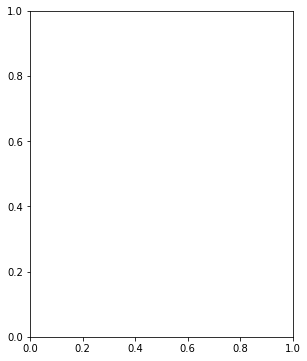

In [141]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

    


#  adaboost predictions

In [138]:
predictions= grid_search_ABC.predict_proba(df_12[X_train.columns])
roc = metrics.roc_auc_score(df_12.redemption_status, predictions[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 97.50%


In [258]:
len(predictions)

50226

In [120]:
# parameter grid
param_grid = {"learning_rate": [0.1,0.2],
              "subsample": [0.3, 0.6, 0.9]
             }

In [121]:
# adaboost with the tree as base estimator
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [122]:
# run grid search
folds = 3
grid_search_GBC = GridSearchCV(abc, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train, y_train)

NameError: name 'abc' is not defined

In [ ]:
cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

In [ ]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')


In [139]:
# fit model on training data with default hyperparameters
from xgboost import XGBClassifier
model = XGBClassifier()
# model.fit(X_train, y_train,verbose=1)

In [368]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(df_1[X_train.columns])
y_pred[:10]

array([[0.9940135 , 0.00598652],
       [0.9913527 , 0.00864734],
       [0.98756933, 0.01243066],
       [0.9974602 , 0.0025398 ],
       [0.9973404 , 0.00265961],
       [0.9954157 , 0.00458431],
       [0.99788314, 0.00211687],
       [0.99654   , 0.00346001],
       [0.9975487 , 0.00245131],
       [0.9955183 , 0.00448165]], dtype=float32)

In [369]:
# evaluate predictions
roc = metrics.roc_auc_score(df_1.redemption_status, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

AUC: 87.44%


In [140]:
# hyperparameter tuning with XGBoost
from sklearn.model_selection import GridSearchCV,KFold
# creating a KFold object 
folds = 3
 
# specify range of hyperparameters
param_grid = {"max_depth" : [3],
    'learning_rate': [0.1], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(n_estimators=800,n_jobs=-1)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 10000,
                        return_train_score=True,n_jobs=-1)      



In [141]:
X_train.isnull().sum()

id                               0
campaign_id                      0
coupon_id                        0
customer_id                      0
campaign_type                    0
age_range                        0
marital_status                   0
rented                           0
family_size                      0
no_of_children                   0
income_bracket                   0
quantity sum                     0
quantity mean                    0
selling_price sum                0
selling_price mean               0
other_discount sum               0
other_discount mean              0
coupon_discount sum              0
coupon_discount size             0
coupon_discount mean             0
Transaction_date_WEEKDAY sum     0
Transaction_date_WEEKDAY mean    0
Start_WEEKDAY                    0
end_WEEKDAY                      0
start_date_day                   0
start_date_month                 0
start_date_day_of_week           0
start_date_day_of_year           0
end_date_day        

In [142]:
# fit the model
# from sklearn import preprocessing
# for f in X_train.columns: 
#     if X_train[f].dtype=='object': 
#         lbl = preprocessing.LabelEncoder() 
#         lbl.fit(list(train[f].values)) 
#         train[f] = lbl.transform(list(train[f].values))

# for f in X_test.columns: 
#     if X_test[f].dtype=='object': 
#         lbl = preprocessing.LabelEncoder() 
#         lbl.fit(list(test[f].values)) 
#         test[f] = lbl.transform(list(test[f].values))

# train.fillna((-999), inplace=True) 
# test.fillna((-999), inplace=True)

# train=np.array(train) 
# test=np.array(test) 
# train = train.astype(float) 
# test = test.astype(float)
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
Pickling array (shape=(44,), dtype=object).
Pickling array (shape=(62695,), dtype=int64).
Memmapping (shape=(22, 62695), dtype=int64) to new file C:\Users\VIVEKA~1\AppData\Local\Temp\joblib_memmapping_folder_16708_9339505745\16708-2111720598856-fa31581747fe43baa679ded867d3ca97.pkl
Memmapping (shape=(9, 62695), dtype=int32) to new file C:\Users\VIVEKA~1\AppData\Local\Temp\joblib_memmapping_folder_16708_9339505745\16708-2111720598856-a712a66c5d2d4823bd33f920245bb007.pkl
Memmapping (shape=(13, 62695), dtype=float64) to new file C:\Users\VIVEKA~1\AppData\Local\Temp\joblib_memmapping_folder_16708_9339505745\16708-2111720598856-0ab559fa610a4cc0b18718bed05d65ea.pkl
Pickling array (shape=(22,), dtype=object).
Pickling array (shape=(9,), dtype=object).
Pickling array (shape=(13,), dtype=object).
Pickling array (shape=(22,), dtype=int64).
Pickling array (shape=(

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:   43.9s remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   3 out of   9 | elapsed:   44.3s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:   45.9s remaining:   57.3s
[Parallel(n_jobs=-1)]: Done   5 out of   9 | elapsed:   46.2s remaining:   36.9s
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   46.3s remaining:   23.1s
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   51.0s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   51.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   51.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=800, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=T

In [143]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,41.687478,0.181078,0.411377,0.005665,0.1,3,0.3,"{'learning_rate': 0.1, 'max_depth': 3, 'subsam...",0.910807,0.910905,0.904687,0.908800,0.002908,3,0.998596,0.998549,0.998654,0.998599,0.000043
1,48.797328,0.064408,0.401378,0.001636,0.1,3,0.6,"{'learning_rate': 0.1, 'max_depth': 3, 'subsam...",0.905965,0.912941,0.916212,0.911706,0.004274,2,0.999414,0.999424,0.999420,0.999419,0.000004
2,43.776052,0.189534,0.386273,0.005451,0.1,3,0.9,"{'learning_rate': 0.1, 'max_depth': 3, 'subsam...",0.910300,0.918584,0.912401,0.913762,0.003516,1,0.999440,0.999352,0.999496,0.999429,0.000059


In [271]:
#0.94
# 0.9713586112683561
#0.9743768502794014
# 0.9785380133697151
# 0.9810897116514686
# 0.9821628472023457

y_pred =model_cv.predict_proba(df_12[X_train.columns])
y_pred[:10]
# auc = metrics.roc_auc_score(df_1.redemption_status, y_pred[:, 1])
# auc
# df_12.red

array([[9.4963372e-01, 5.0366290e-02],
       [9.9989116e-01, 1.0881521e-04],
       [9.5877302e-01, 4.1226972e-02],
       [9.9839461e-01, 1.6054163e-03],
       [9.9970794e-01, 2.9205397e-04],
       [9.9975973e-01, 2.4028131e-04],
       [9.9197209e-01, 8.0279121e-03],
       [9.9975514e-01, 2.4486118e-04],
       [9.9985546e-01, 1.4454103e-04],
       [9.9946427e-01, 5.3570315e-04]], dtype=float32)

In [145]:
df_1.isnull().sum()

id                               0
campaign_id                      0
coupon_id                        0
customer_id                      0
redemption_status                0
campaign_type                    0
age_range                        0
marital_status                   0
rented                           0
family_size                      0
no_of_children                   0
income_bracket                   0
quantity sum                     0
quantity mean                    0
selling_price sum                0
selling_price mean               0
other_discount sum               0
other_discount mean              0
coupon_discount sum              0
coupon_discount size             0
coupon_discount mean             0
Transaction_date_WEEKDAY sum     0
Transaction_date_WEEKDAY mean    0
Start_WEEKDAY                    0
end_WEEKDAY                      0
start_date_day                   0
start_date_month                 0
start_date_day_of_week           0
start_date_day_of_ye

In [146]:
# coupon_item.to_csv('couponwithitem.csv',index_label=False)

In [585]:
# coupon_item.head()

,coupon_id,item_id,brand,brand_type,category
0,105,37,56,Local,Grocery
1,107,75,56,Local,Grocery
2,494,76,209,Established,Grocery
3,522,77,278,Established,Grocery
4,518,77,278,Established,Grocery


In [595]:
# coupon_item_mode = coupon_item.groupby('coupon_id').agg(lambda x:x.value_counts().index[0]).reset_index()

In [626]:
# coupon_item_mode.head()

,coupon_id,item_id,brand,brand_type,category
0,1,59838,1475,Established,Natural Products
1,2,12901,2084,Established,Grocery
2,3,58943,278,Established,Grocery
3,4,14059,544,Established,Grocery
4,5,57016,5357,Established,Pharmaceutical


In [621]:
# a = coupon_item.groupby('coupon_id')['item_id', 'brand', 'brand_type', 'category'].agg(lambda x:len(x.value_counts())).reset_index()

In [623]:
# a.head()

,coupon_id,item_id,brand,brand_type,category
0,1,39,3,1,2
1,2,2,1,1,1
2,3,17,2,1,1
3,4,24,1,1,1
4,5,7,1,1,1


In [638]:
# coupon_item_mode['category'].value_counts().shape

(11,)

In [624]:
# a.columns = ['coupon_id','item_id_size','brand_size','brand_type_category_size','category_size']

In [625]:
# a.head()

,coupon_id,item_id_size,brand_size,brand_type_category_size,category_size
0,1,39,3,1,2
1,2,2,1,1,1
2,3,17,2,1,1
3,4,24,1,1,1
4,5,7,1,1,1


In [640]:
# ab = coupon_item_mode.merge(a,on='coupon_id',how='left')

In [641]:
# ab.head()

,coupon_id,item_id,brand,brand_type,category,item_id_size,brand_size,brand_type_category_size,category_size
0,1,59838,1475,Established,Natural Products,39,3,1,2
1,2,12901,2084,Established,Grocery,2,1,1,1
2,3,58943,278,Established,Grocery,17,2,1,1
3,4,14059,544,Established,Grocery,24,1,1,1
4,5,57016,5357,Established,Pharmaceutical,7,1,1,1


In [287]:
cols112 = X_train.columns

In [288]:
type(y_pred)

numpy.ndarray

In [272]:
dfres = pd.DataFrame({'id':idx,'redemption_status':y_pred[:, 1]})

In [273]:
len(dfres)

50226

In [274]:
df_1.isnull().sum()

id                               0
campaign_id                      0
coupon_id                        0
customer_id                      0
campaign_type                    0
age_range                        0
marital_status                   0
rented                           0
family_size                      0
no_of_children                   0
income_bracket                   0
quantity sum                     0
quantity mean                    0
selling_price sum                0
selling_price mean               0
other_discount sum               0
other_discount mean              0
coupon_discount sum              0
coupon_discount size             0
coupon_discount mean             0
Transaction_date_WEEKDAY sum     0
Transaction_date_WEEKDAY mean    0
Start_WEEKDAY                    0
end_WEEKDAY                      0
start_date_day                   0
start_date_month                 0
start_date_day_of_week           0
start_date_day_of_year           0
end_date_day        

In [275]:
dfres.to_csv('pred1_4_imputed_ITem_coupon4.csv')

In [264]:
# feature importance
importance = dict(zip(X_train.columns, cv_results.feature_importances_))
importance

AttributeError: 'DataFrame' object has no attribute 'feature_importances_'

In [129]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [138]:
# Binary Classification with Sonar Dataset: Standardized Larger
from tensorflow import keras
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# load dataset
# dataframe = read_csv("sonar.csv", header=None)
# dataset = dataframe.values
# split into input (X) and output (Y) variables
X = X_train
Y = y_train
metrics = [
      keras.metrics.Accuracy(name='accuracy'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
      
  ]

# encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)
# larger model
def create_larger():
	
    model = keras.Sequential([
      keras.layers.Dense(40, input_dim=40, activation='relu'),
      keras.layers.Dense(30, activation='relu'),
      keras.layers.Dense(1, activation='sigmoid'),
      keras.layers.Dense(1, activation='sigmoid'),
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, df_12[X_train.columns], df_12.redemption_status, cv=kfold,verbose=1000)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  ................................................................


KeyboardInterrupt: 

In [266]:
df_12.rede

,id,campaign_id,coupon_id,customer_id,campaign_type,age_range,marital_status,rented,family_size,no_of_children,income_bracket,quantity sum,quantity mean,selling_price sum,selling_price mean,other_discount sum,other_discount mean,coupon_discount sum,coupon_discount size,coupon_discount mean,Transaction_date_WEEKDAY sum,Transaction_date_WEEKDAY mean,Start_WEEKDAY,end_WEEKDAY,start_date_day,start_date_month,start_date_day_of_week,start_date_day_of_year,end_date_day,end_date_month,end_date_day_of_week,end_date_day_of_year,item_id,brand,brand_type,category,item_id_size,brand_size,brand_type_category_size,category_size
0,3,22,869,967,0,2,2,0.0,0,3,5.000000,498.0,1.094505,50078.45,110.062527,-5055.87,-11.111802,-1216.38,455.0,-2.673363,50.0,0.109890,0.0,0.0,16,9,0,259,18,10,4,291,23622,1075,0,3,72,1,1,1
1,4,20,389,1566,1,1,2,0.0,1,3,9.000000,156974.0,178.989738,105884.06,120.734390,-10522.76,-11.998586,-1089.25,877.0,-1.242018,492.0,0.561003,1.0,1.0,7,9,5,250,16,11,5,320,32087,57,0,7,33,3,1,1
2,5,22,981,510,0,1,2,0.0,1,0,1.000000,34487.0,64.582397,47740.40,89.401498,-15211.38,-28.485730,-1020.52,534.0,-1.911086,210.0,0.393258,0.0,0.0,16,9,0,259,18,10,4,291,2398,1335,0,3,19,1,1,1
3,8,25,1069,361,1,0,2,0.0,0,3,3.000000,196.0,1.248408,9752.99,62.120955,-1539.47,-9.805541,0.00,157.0,0.000000,58.0,0.369427,0.0,0.0,21,10,0,294,22,11,4,326,29566,1996,0,3,74,1,1,1
4,10,17,498,811,1,6,2,0.0,5,3,4.702825,412.0,1.337662,26060.91,84.613344,-3993.29,-12.965227,-35.62,308.0,-0.115649,82.0,0.266234,0.0,0.0,29,7,0,210,30,8,4,242,45021,209,0,3,18,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50221,128584,20,843,501,1,3,2,0.0,0,3,5.000000,403.0,1.138418,29269.57,82.682401,-6794.00,-19.192090,0.00,354.0,0.000000,81.0,0.228814,1.0,1.0,7,9,5,250,16,11,5,320,66031,1009,0,3,8,2,1,1
50222,128588,25,415,481,1,2,0,1.0,3,1,2.000000,22933.0,28.919294,44981.41,56.723090,-6663.05,-8.402333,-853.81,793.0,-1.076683,193.0,0.243380,0.0,0.0,21,10,0,294,22,11,4,326,42492,89,0,3,107,1,1,1
50223,128591,25,596,1336,1,2,0,0.0,4,2,9.000000,444361.0,568.964149,113451.99,145.265032,-10496.79,-13.440192,-963.50,781.0,-1.233675,333.0,0.426376,0.0,0.0,21,10,0,294,22,11,4,326,51504,487,0,3,69,1,1,2
50224,128593,22,518,748,0,3,0,0.0,2,0,8.000000,351526.0,439.957447,100652.04,125.972516,-15024.17,-18.803717,-2810.03,799.0,-3.516934,350.0,0.438048,0.0,0.0,16,9,0,259,18,10,4,291,31615,278,0,3,70,1,1,1


,coupon_id,item_id,brand,brand_type,category,item_id_size,brand_size,brand_type_category_size,category_size,category_gr,brand_gr,brand_type_gr
0,1,59838,1475,Established,Natural Products,39,3,1,2,"Natural Products,Grocery","4700,1475,1558",Established
1,2,12901,2084,Established,Grocery,2,1,1,1,Grocery,2084,Established
2,3,58943,278,Established,Grocery,17,2,1,1,Grocery,"1558,278",Established
3,4,14059,544,Established,Grocery,24,1,1,1,Grocery,544,Established
4,5,57016,5357,Established,Pharmaceutical,7,1,1,1,Pharmaceutical,5357,Established


In [186]:
coupon_group = coupon_item.groupby('coupon_id')['item_id', 'brand', 'brand_type', 'category'].agg(lambda x:list(x.unique())).reset_index()

In [187]:
coupon_group.head()

,coupon_id,item_id,brand,brand_type,category
0,1,"[60068, 50199, 17091, 44112, 44868, 51028, 592...","[4700, 1475, 1558]",[Established],"[Natural Products, Grocery]"
1,2,"[2581, 12901]",[2084],[Established],[Grocery]
2,3,"[58906, 58943, 58944, 58946, 58964, 58972, 590...","[1558, 278]",[Established],[Grocery]
3,4,"[36772, 51649, 51212, 51221, 51243, 51598, 528...",[544],[Established],[Grocery]
4,5,"[57118, 53496, 57079, 46144, 46006, 44994, 57016]",[5357],[Established],[Pharmaceutical]


In [188]:
coupon_group['category_gr'] = coupon_group['category'].apply(lambda x11 : ','.join(x11))

In [206]:
coupon_group['brand_gr'] = coupon_group['brand'].apply(lambda x11 : ','.join(str(x) for x in x11))
# ', '.join(str(x) for x in list_of_ints)

In [207]:
coupon_group['brand_type_gr'] = coupon_group['brand_type'].apply(lambda x11 : ','.join((x11)))

In [208]:
# coupon_group['item_id_gr'] = coupon_group['item_id'].apply(lambda x11 : ','.join(str(x11)))

In [209]:
coupon_group.head()

,coupon_id,item_id,brand,brand_type,category,category_gr,brand_gr,brand_type_gr
0,1,"[60068, 50199, 17091, 44112, 44868, 51028, 592...","[4700, 1475, 1558]",[Established],"[Natural Products, Grocery]","Natural Products,Grocery","4700,1475,1558",Established
1,2,"[2581, 12901]",[2084],[Established],[Grocery],Grocery,2084,Established
2,3,"[58906, 58943, 58944, 58946, 58964, 58972, 590...","[1558, 278]",[Established],[Grocery],Grocery,"1558,278",Established
3,4,"[36772, 51649, 51212, 51221, 51243, 51598, 528...",[544],[Established],[Grocery],Grocery,544,Established
4,5,"[57118, 53496, 57079, 46144, 46006, 44994, 57016]",[5357],[Established],[Pharmaceutical],Pharmaceutical,5357,Established


In [215]:
coupon_group.drop(['item_id','brand','brand_type','category'],axis=1,inplace=True)
coupon_group.head()

KeyError: "['item_id' 'brand' 'brand_type' 'category'] not found in axis"

In [217]:
coupon_group.head()

,coupon_id,category_gr,brand_gr,brand_type_gr
0,1,"Natural Products,Grocery","4700,1475,1558",Established
1,2,Grocery,2084,Established
2,3,Grocery,"1558,278",Established
3,4,Grocery,544,Established
4,5,Pharmaceutical,5357,Established


In [212]:
len(coupon_group['brand_gr'].unique())

412

In [218]:
coupon = coupon_merge.merge(coupon_group[['coupon_id','category_gr','brand_gr','brand_type_gr']],on="coupon_id",how='left')

In [219]:
coupon.head()

,coupon_id,item_id,brand,brand_type,category,item_id_size,brand_size,brand_type_category_size,category_size,category_gr,brand_gr,brand_type_gr
0,1,59838,1475,Established,Natural Products,39,3,1,2,"Natural Products,Grocery","4700,1475,1558",Established
1,2,12901,2084,Established,Grocery,2,1,1,1,Grocery,2084,Established
2,3,58943,278,Established,Grocery,17,2,1,1,Grocery,"1558,278",Established
3,4,14059,544,Established,Grocery,24,1,1,1,Grocery,544,Established
4,5,57016,5357,Established,Pharmaceutical,7,1,1,1,Pharmaceutical,5357,Established


In [213]:
coupon_group.head()

,coupon_id,category_gr,brand_gr,brand_type_gr
0,1,"Natural Products,Grocery","4700,1475,1558",Established
1,2,Grocery,2084,Established
2,3,Grocery,"1558,278",Established
3,4,Grocery,544,Established
4,5,Pharmaceutical,5357,Established
